## Análise exploratória histórica de emissões de carbono

### Análise Inicial dos dados

Fonte: [Our world in data](https://ourworldindata.org/explorers/co2?facet=none&Gas+or+Warming=CO%E2%82%82&Accounting=Territorial&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+country&Relative+to+world+total=false&country=CHN~USA~IND~GBR~OWID_WRL)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dados = pd.read_csv('dataset\\co2_emission_2017.csv') # Importando os dados

# Conjunto de dados atualizado:
dados = pd.read_csv('dataset\\annual_co2_emissions_2022.csv')

In [3]:
df = pd.DataFrame(dados) # Criando o DataFrame
df.head(10)

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
5,Afghanistan,AFG,1954,106256.0
6,Afghanistan,AFG,1955,153888.0
7,Afghanistan,AFG,1956,183200.0
8,Afghanistan,AFG,1957,293120.0
9,Afghanistan,AFG,1958,329760.0


In [4]:
# Renomeando Coluna para facilitar a digitação
df.rename(columns = {'Annual CO₂ emissions': 'CO2 emissions (ton)'}, inplace = True)
# df.drop(columns= 'Code', inplace= True)
df.head()

,Entity,Code,Year,CO2 emissions (ton)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30308 entries, 0 to 30307
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               30308 non-null  object 
 1   Code                 24157 non-null  object 
 2   Year                 30308 non-null  int64  
 3   CO2 emissions (ton)  30308 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 947.3+ KB


In [6]:
print(f'Existem {len(df['Entity'].unique())} países/entidades únicas no banco de dados')

Existem 250 países/entidades únicas no banco de dados


### Funções

In [7]:
# Função para validar se os países a serem validados estão no banco de dados recebendo uma lista de países
def valida_paises(lista):
    # Cria uma lista com todos os países/entidades do banco de dados
    lista_paises_dataframe = df['Entity'].unique()
    # Cria uma lista para os paises forem validados
    paises_validados = []
    
    # Percorre a lista inicial validando cada item
    for pais in lista:
        # Adiciona o país na lista de validados caso ele esteja presente no banco de dados
        if pais in lista_paises_dataframe:
            paises_validados.append(pais)
            print(f'O país {pais} está presente na base de dados')
        # Informa que o país não está no banco de dados
        elif pais not in lista_paises_dataframe:
            print(f'O país {pais} não consta na base de dados')
    
    return paises_validados

In [8]:
#Cria um DataFrame com todos os países desejados
def criando_dataframe_seletivo(lista, dataframe):
    # Cria um Dataframe vazio para o concat()
    df_agrupado = pd.DataFrame()
    # Prepara a lista utilizado no concat() já com o DataFrame inicial
    lista_dataframes = [df_agrupado]
    
    # Realiza a iteração de cara item na lista de países
    for item in lista:
        # Seleciona o país, cria um DataFrame com os valores
        a = (dataframe[dataframe['Entity'] == item])
        a = pd.DataFrame(a)
        # Adiciona o DataFrama na lista do concat()
        lista_dataframes.append(a)
        # Concatena os DataFrames
        df_agrupado = pd.concat(lista_dataframes)
        
    return df_agrupado

### Análise dados do Brasil

In [9]:
# Selecionando apenas os dados referentes ao Brasil
df_brazil = df[df['Entity'] == 'Brazil']
df_brazil.head()

,Entity,Code,Year,CO2 emissions (ton)
4498,Brazil,BRA,1901,2103136.0
4499,Brazil,BRA,1902,2506176.0
4500,Brazil,BRA,1903,2440224.0
4501,Brazil,BRA,1904,2619760.0
4502,Brazil,BRA,1905,2799296.0


In [10]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 4498 to 4619
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               122 non-null    object 
 1   Code                 122 non-null    object 
 2   Year                 122 non-null    int64  
 3   CO2 emissions (ton)  122 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


In [11]:
df_brazil.describe(include = float)

,CO2 emissions (ton)
count,1.220000e+02
mean,1.407933e+08
std,1.683780e+08
min,2.103136e+06
25%,5.533289e+06
50%,5.137465e+07
75%,2.325492e+08
max,5.579010e+08


In [12]:
df_brazil.reset_index(drop= True, inplace= True) # Resetando os índices
df_brazil

,Entity,Code,Year,CO2 emissions (ton)
0,Brazil,BRA,1901,2103136.0
1,Brazil,BRA,1902,2506176.0
2,Brazil,BRA,1903,2440224.0
3,Brazil,BRA,1904,2619760.0
4,Brazil,BRA,1905,2799296.0
...,...,...,...,...
117,Brazil,BRA,2018,477998620.0
118,Brazil,BRA,2019,473464400.0
119,Brazil,BRA,2020,444504320.0
120,Brazil,BRA,2021,497206340.0


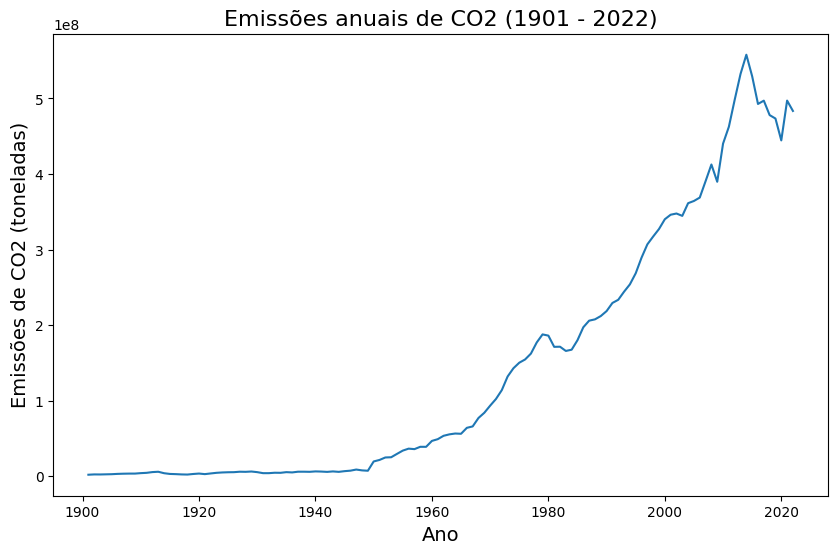

In [13]:
# Criando o gráfico de linha
plt.figure(figsize = (10, 6))
plt.plot(df_brazil['Year'], df_brazil['CO2 emissions (ton)'])
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Emissões de CO2 (toneladas)', fontsize = 14)
plt.title('Emissões anuais de CO2 (1901 - 2022)', fontsize = 16)
plt.show()

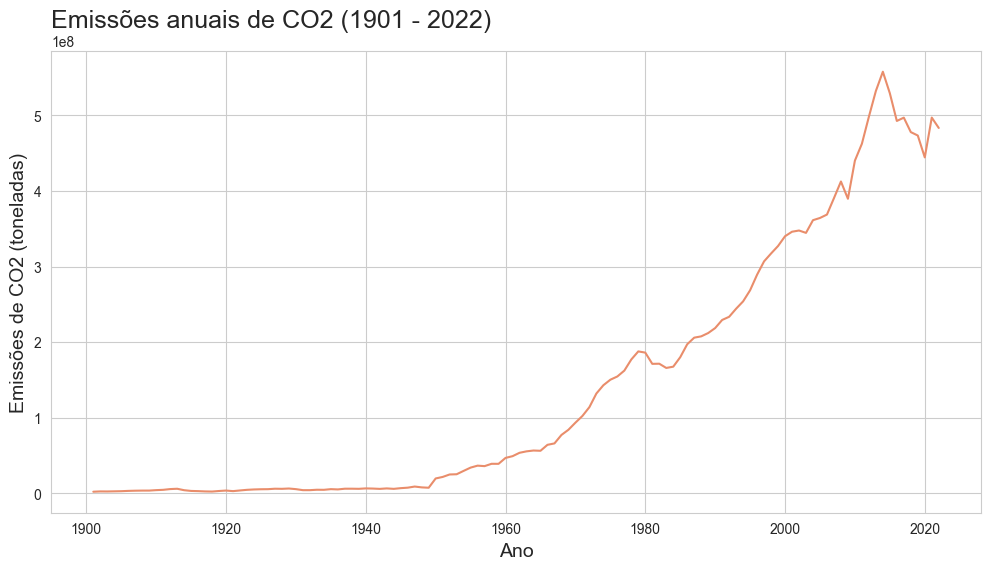

In [14]:
# Coloca a Paleta do gráfico
sns.set_palette('flare')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.lineplot(x= 'Year', y= 'CO2 emissions (ton)', data= df_brazil)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Emissões anuais de CO2 (1901 - 2022)', loc= 'left', fontsize= 18)
ax.set_xlabel('Ano', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax



### Análise das Emissões por década no Brasil

In [15]:
df_brazil_agrupado_raw = df_brazil.copy()
df_brazil_agrupado_raw.head()

,Entity,Code,Year,CO2 emissions (ton)
0,Brazil,BRA,1901,2103136.0
1,Brazil,BRA,1902,2506176.0
2,Brazil,BRA,1903,2440224.0
3,Brazil,BRA,1904,2619760.0
4,Brazil,BRA,1905,2799296.0


In [16]:
# Coloca a coluna 'Year' como o índice
df_brazil_agrupado_raw.set_index(df_brazil_agrupado_raw['Year'], inplace= True)

# Deleta as colunas desnecessárias para realizar o agrupamento mais tarde
df_brazil_agrupado_raw.drop(columns= ['Year', 'Code', 'Entity'], inplace= True)

df_brazil_agrupado_raw.head()

,CO2 emissions (ton)
Year,
1901,2103136.0
1902,2506176.0
1903,2440224.0
1904,2619760.0
1905,2799296.0


In [17]:
# Cria uma lista com os anos a serem selecionados
anos = list(range(1900, 2040, 10))

# Junta os valores em intervalos discretos
grupo = pd.cut(df_brazil_agrupado_raw.index, bins= anos, labels= anos[:-1])

# Agrupa e soma os valores que estiverem em cada grupo
df_brazil_agrupado = df_brazil_agrupado_raw.groupby([grupo], observed= True).sum()
df_brazil_agrupado.head()

,CO2 emissions (ton)
1900,30528448.0
1910,37900416.2
1920,51108037.0
1930,52952886.0
1940,82622020.0


In [18]:
# Prova real da soma
print(df_brazil_agrupado_raw['CO2 emissions (ton)'][110:120].sum())

4966397760.0


In [19]:
df_brazil_agrupado.drop(df_brazil_agrupado.index[-1], inplace= True)

df_brazil_agrupado.head(5)

,CO2 emissions (ton)
1900,30528448.0
1910,37900416.2
1920,51108037.0
1930,52952886.0
1940,82622020.0


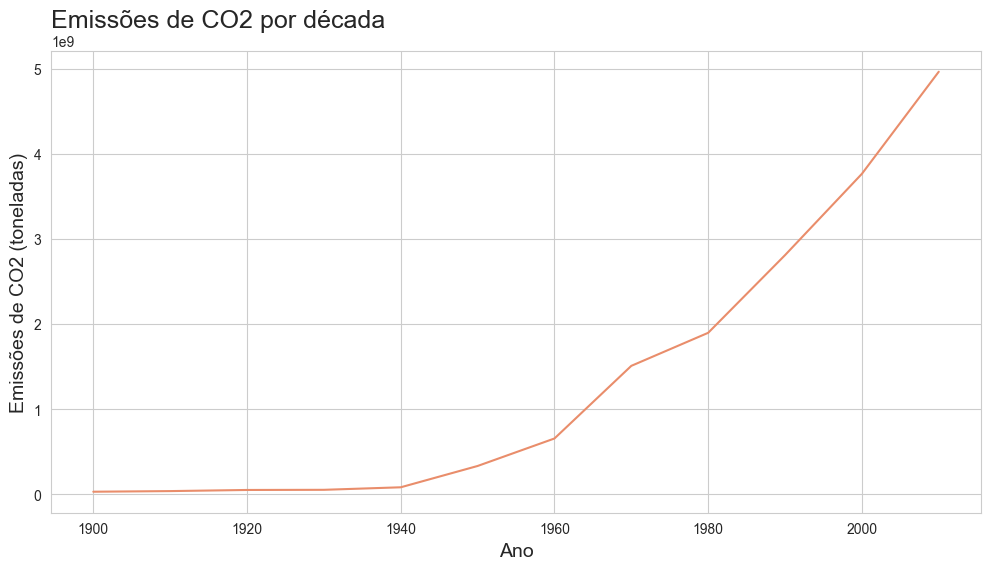

In [20]:
# Coloca a Paleta do gráfico
sns.set_palette('flare')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.lineplot(x= df_brazil_agrupado.index, y= 'CO2 emissions (ton)', data= df_brazil_agrupado)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Emissões de CO2 por década', loc= 'left', fontsize= 18)
ax.set_xlabel('Ano', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax


### Análise dos 5 países mais ricos

In [21]:
paises_desejados = ['United States', 'China', 'Japan', 'Germany', 'India']

top_five_rich = valida_paises(paises_desejados)

O país United States está presente na base de dados
O país China está presente na base de dados
O país Japan está presente na base de dados
O país Germany está presente na base de dados
O país India está presente na base de dados


In [22]:
df_top_five_rich = criando_dataframe_seletivo(top_five_rich, df)   # type: ignore
df_top_five_rich.reset_index(inplace= True, drop= True)
df_top_five_rich

,Entity,Code,Year,CO2 emissions (ton)
0,United States,USA,1800,2.528160e+05
1,United States,USA,1801,2.674720e+05
2,United States,USA,1802,2.894560e+05
3,United States,USA,1803,2.967840e+05
4,United States,USA,1804,3.334240e+05
...,...,...,...,...
874,India,IND,2018,2.593058e+09
875,India,IND,2019,2.612888e+09
876,India,IND,2020,2.421552e+09
877,India,IND,2021,2.674222e+09


In [23]:
df_top_five_rich.describe(include = float)

,CO2 emissions (ton)
count,8.790000e+02
mean,1.034124e+09
std,1.826025e+09
min,1.099200e+04
25%,3.427785e+07
50%,2.538826e+08
75%,1.056950e+09
max,1.139678e+10


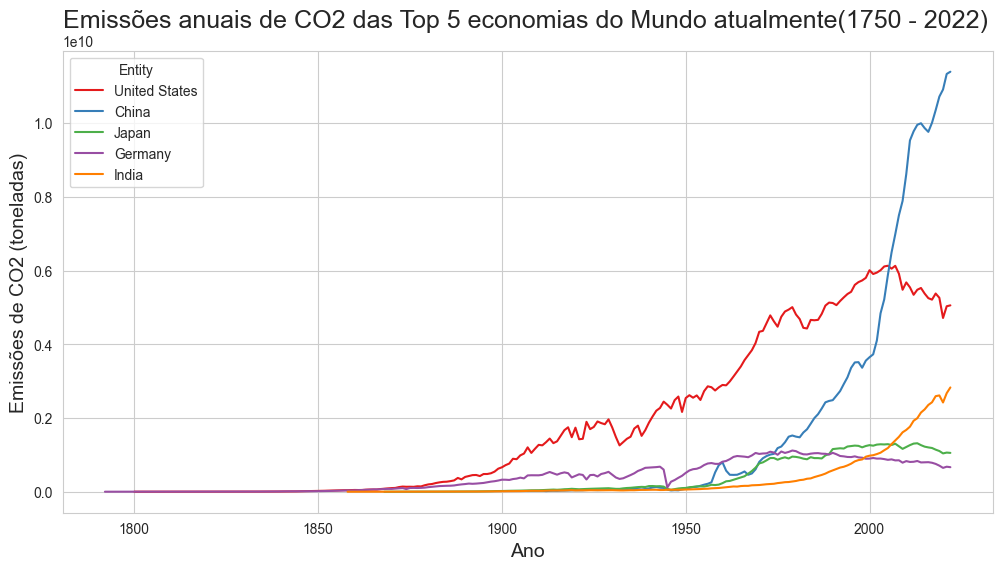

In [24]:
# Coloca a Paleta do gráfico
sns.set_palette('Set1')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.lineplot(x= 'Year', y= 'CO2 emissions (ton)', hue= 'Entity', data= df_top_five_rich)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Emissões anuais de CO2 das Top 5 economias do Mundo atualmente(1750 - 2022)', loc= 'left', fontsize= 18)
ax.set_xlabel('Ano', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax


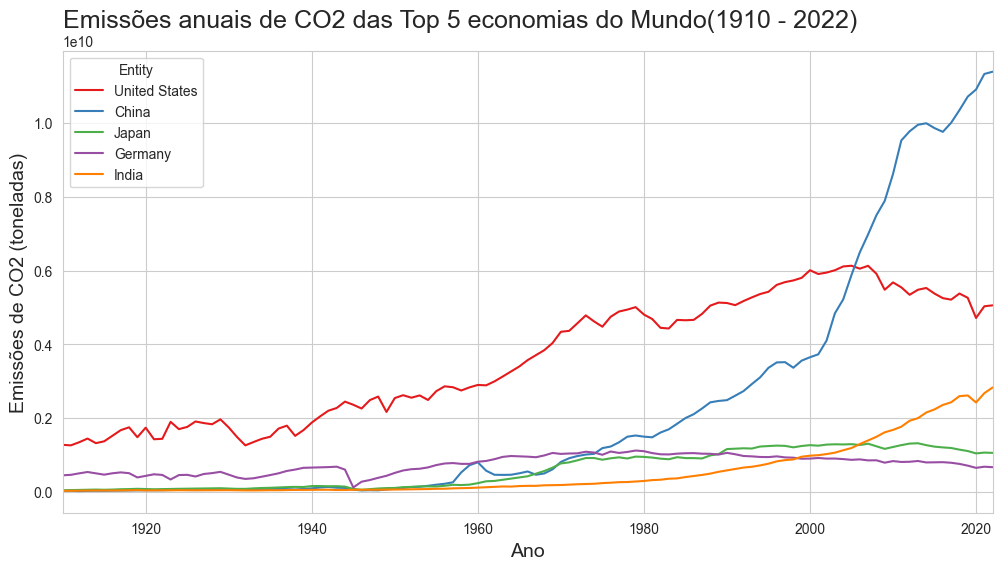

In [25]:
# Coloca a Paleta do gráfico
sns.set_palette('Set1')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.lineplot(x= 'Year', y= 'CO2 emissions (ton)', hue= 'Entity', data= df_top_five_rich)
ax.set_xlim(1910, 2022)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Emissões anuais de CO2 das Top 5 economias do Mundo(1910 - 2022)', loc= 'left', fontsize= 18)
ax.set_xlabel('Ano', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax


In [26]:
df_top_five_rich_1910 = df_top_five_rich.copy()
df_top_five_rich_1910

,Entity,Code,Year,CO2 emissions (ton)
0,United States,USA,1800,2.528160e+05
1,United States,USA,1801,2.674720e+05
2,United States,USA,1802,2.894560e+05
3,United States,USA,1803,2.967840e+05
4,United States,USA,1804,3.334240e+05
...,...,...,...,...
874,India,IND,2018,2.593058e+09
875,India,IND,2019,2.612888e+09
876,India,IND,2020,2.421552e+09
877,India,IND,2021,2.674222e+09


In [27]:
# Pega cada valor de ano do Dataframe
for year in df_top_five_rich_1910['Year']:
    # Compara o valor com o ano desejado
    if year < 1910:
        # Adiciona o índice do ano que for ser excluido a uma variável
        i = df_top_five_rich_1910[df_top_five_rich_1910['Year'] == year].index
        # Dropa a linha com base no índice obtido
        df_top_five_rich_1910.drop(i, inplace= True)

df_top_five_rich_1910.reset_index(drop= True, inplace= True)
df_top_five_rich_1910

,Entity,Code,Year,CO2 emissions (ton)
0,United States,USA,1910,1.271582e+09
1,United States,USA,1911,1.258667e+09
2,United States,USA,1912,1.343566e+09
3,United States,USA,1913,1.442542e+09
4,United States,USA,1914,1.317980e+09
...,...,...,...,...
560,India,IND,2018,2.593058e+09
561,India,IND,2019,2.612888e+09
562,India,IND,2020,2.421552e+09
563,India,IND,2021,2.674222e+09


### Encontrando os 10 países que mais emitiram CO2 no período de 1922 - 2022

**Limpando o DataFrame de Entidades desnecessárias**

In [28]:
df_country_only = df.copy()
df_country_only

,Entity,Code,Year,CO2 emissions (ton)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


In [29]:
# Dropa os NaN dentro do DataFrame, deixando somente os países
df_country_only.dropna(inplace= True)
# Pega o índice das linhas com dados 'World' para retirar esses dados do DataFrame
i = df_country_only[df_country_only['Entity'] == 'World'].index
df_country_only.drop(i, inplace= True)

df_country_only.reset_index(drop= True, inplace= True)
df_country_only

,Entity,Code,Year,CO2 emissions (ton)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
23879,Zimbabwe,ZWE,2018,10714598.0
23880,Zimbabwe,ZWE,2019,9775428.0
23881,Zimbabwe,ZWE,2020,7849639.0
23882,Zimbabwe,ZWE,2021,8396158.0


In [30]:
print(f'Existem {len(df_country_only['Entity'].unique())} países/entidades únicas no banco de dados')

Existem 216 países/entidades únicas no banco de dados


**Limpando o DataFrame dos anos desnecessários**

In [31]:
df_co2_1922 = df_country_only.copy()
df_co2_1922

,Entity,Code,Year,CO2 emissions (ton)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
23879,Zimbabwe,ZWE,2018,10714598.0
23880,Zimbabwe,ZWE,2019,9775428.0
23881,Zimbabwe,ZWE,2020,7849639.0
23882,Zimbabwe,ZWE,2021,8396158.0


In [32]:
# Pega cada valor de ano do Dataframe
for year in df_co2_1922['Year']:
    # Compara o valor com o ano desejado
    if year < 1922:
        # Adiciona o índice do ano que for ser excluido a uma variável
        i = df_co2_1922[df_co2_1922['Year'] == year].index
        # Dropa a linha com base no índice obtido
        df_co2_1922.drop(i, inplace= True)

df_co2_1922.head(5)

,Entity,Code,Year,CO2 emissions (ton)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


**Encontrando os 10 que mais emitiram CO2**

In [33]:
# Agrupa os dados por país, realiza a somatória das emissões e reseta o índice do DataFrame
df_sum_co2_1922 = df_co2_1922.groupby('Entity')['CO2 emissions (ton)'].sum().reset_index()
df_sum_co2_1922

,Entity,CO2 emissions (ton)
0,Afghanistan,2.307563e+08
1,Albania,2.988879e+08
2,Algeria,5.076750e+09
3,Andorra,1.569180e+07
4,Angola,6.789755e+08
...,...,...
211,Vietnam,4.992825e+09
212,Wallis and Futuna,7.970160e+05
213,Yemen,6.875728e+08
214,Zambia,2.684593e+08


In [34]:
# Pega apenas os 10 países que mais emitiram durante o período
df_top_ten_sum_co2_1922 = df_sum_co2_1922.sort_values('CO2 emissions (ton)', ascending= False).head(10)
df_top_ten_sum_co2_1922

,Entity,CO2 emissions (ton)
206,United States,3.899625e+11
41,China,2.601954e+11
160,Russia,1.177514e+11
76,Germany,7.845438e+10
98,Japan,6.656215e+10
90,India,5.906299e+10
205,United Kingdom,5.249286e+10
36,Canada,3.312863e+10
71,France,3.287845e+10
203,Ukraine,3.047260e+10


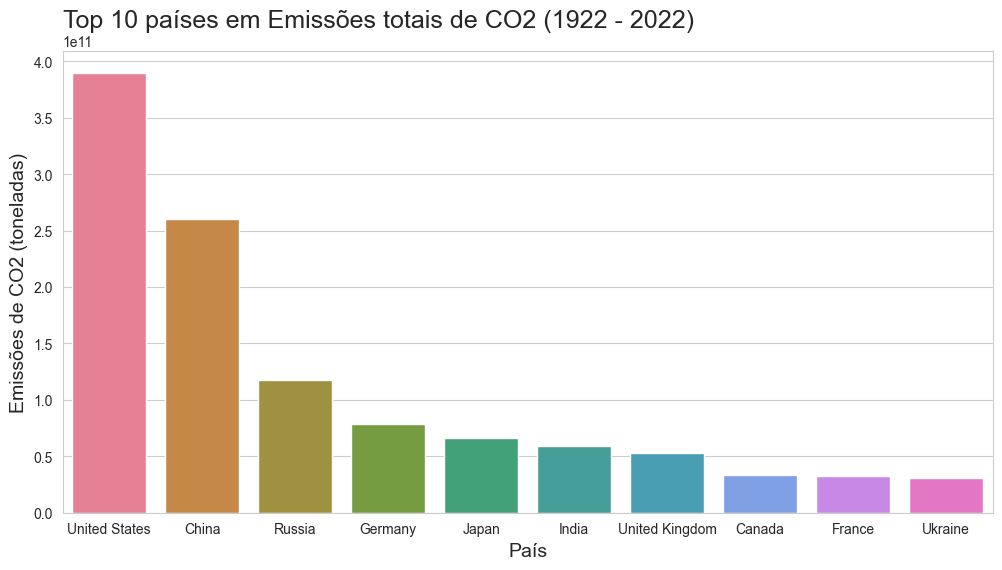

In [35]:
# Coloca a Paleta do gráfico
sns.set_palette('Set1')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.barplot(x= 'Entity', y= 'CO2 emissions (ton)', hue= 'Entity', data= df_top_ten_sum_co2_1922)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Top 10 países em Emissões totais de CO2 (1922 - 2022)', loc= 'left', fontsize= 18)
ax.set_xlabel('País', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax


In [36]:
paises_desejados = ['United States', 'China', 'Russia', 'Germany', 
                    'Japan', 'India', 'United Kingdom', 'Canada', 
                    'France', 'Ukraine']

df_top_ten_co2_1922 = criando_dataframe_seletivo(paises_desejados, df_co2_1922)
df_top_ten_co2_1922.reset_index(inplace= True, drop= True)
df_top_ten_co2_1922

,Entity,Code,Year,CO2 emissions (ton)
0,United States,USA,1922,1.435758e+09
1,United States,USA,1923,1.896736e+09
2,United States,USA,1924,1.698320e+09
3,United States,USA,1925,1.758186e+09
4,United States,USA,1926,1.906048e+09
...,...,...,...,...
1005,Ukraine,UKR,2018,2.316638e+08
1006,Ukraine,UKR,2019,2.219432e+08
1007,Ukraine,UKR,2020,2.068239e+08
1008,Ukraine,UKR,2021,2.101533e+08


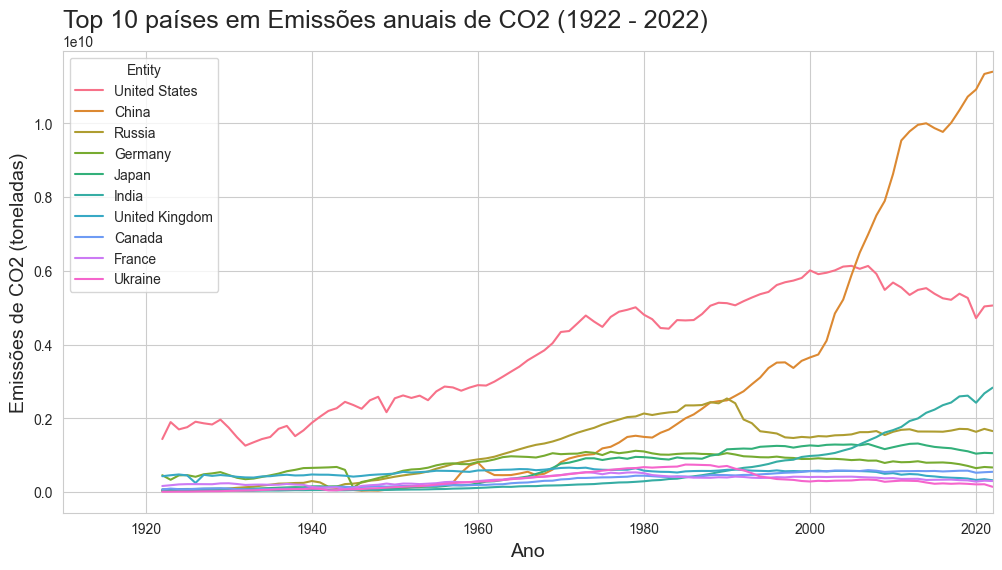

In [37]:
# Coloca a Paleta do gráfico
sns.set_palette('Set1')
#Adiciona uma grid a imagem
sns.set_style('whitegrid')
# Mesmo gráfico no Seaborn
ax = sns.lineplot(x= 'Year', y= 'CO2 emissions (ton)', hue= 'Entity', data= df_top_ten_co2_1922)
ax.set_xlim(1910, 2022)
# Define o tamanho da imagem
ax.figure.set_size_inches(12, 6)
# Cria título e legendas
ax.set_title('Top 10 países em Emissões anuais de CO2 (1922 - 2022)', loc= 'left', fontsize= 18)
ax.set_xlabel('Ano', fontsize= 14)
ax.set_ylabel('Emissões de CO2 (toneladas)', fontsize= 14)
# Retira texto acima da imagem
ax = ax
